In [ ]:
# mengakses google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# mengarahkan posisi ke drive proyek

%cd drive/Shareddrives/Proyek2_Kelompok1

/content/drive/Shareddrives/Proyek2_Kelompok1


In [ ]:
# mengekstrak folder dataset
# dapat di skip jika folder dataset sudah terekstrak

!unzip fer.zip

Streaming output truncated to the last 5000 lines.
 extracting: fer/sad/4594.jpg        
 extracting: fer/sad/4596.jpg        
 extracting: fer/sad/4603.jpg        
 extracting: fer/sad/4609.jpg        
 extracting: fer/sad/4611.jpg        
 extracting: fer/sad/4614.jpg        
 extracting: fer/sad/4615.jpg        
 extracting: fer/sad/462.jpg         
 extracting: fer/sad/4622.jpg        
 extracting: fer/sad/4624.jpg        
 extracting: fer/sad/4647.jpg        
 extracting: fer/sad/4659.jpg        
 extracting: fer/sad/466.jpg         
 extracting: fer/sad/4662.jpg        
 extracting: fer/sad/4667.jpg        
 extracting: fer/sad/4677.jpg        
 extracting: fer/sad/4684.jpg        
 extracting: fer/sad/4686.jpg        
 extracting: fer/sad/4697.jpg        
 extracting: fer/sad/4703.jpg        
 extracting: fer/sad/4705.jpg        
 extracting: fer/sad/4714.jpg        
 extracting: fer/sad/4720.jpg        
 extracting: fer/sad/4729.jpg        
 extracting: fer/sad/4734.jpg        

In [ ]:
# import library yang dibutuhkan untuk proses file

import os

In [ ]:
# deklarasi variabel path

myPath = 'fer/'

In [ ]:
# melakukan join file dataset sesuai tag dan path

file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(myPath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
# import library untuk kebutuhan analisis data

import pandas as pd

In [ ]:
# inisialisasi dataframe

df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
angry       4953
disgust      547
fear        5121
happy       8989
neutral     6198
sad         6077
surprise    4002
dtype: int64

In [ ]:
# cek sample datanya

df.head()

,path,file_name,tag
0,fer/angry/0.jpg,0.jpg,angry
1,fer/angry/1.jpg,1.jpg,angry
2,fer/angry/10.jpg,10.jpg,angry
3,fer/angry/10002.jpg,10002.jpg,angry
4,fer/angry/10016.jpg,10016.jpg,angry


**Train test splitnya**

In [ ]:
# import library untuk train test split

from sklearn.model_selection import train_test_split

In [ ]:
# variabel yang digunakan pada pemisahan data

X= df['path']
y= df['tag']

In [ ]:
# split dataset awal menjadi data train dan test (7:3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=300)

In [ ]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation (3:1)

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.75, random_state=100)

In [ ]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [ ]:
# mengecek jumlah data pada masing-masing set

print('train size', len(df_tr))
print('validation size', len(df_val))
print('test size', len(df_te))

train size 25120
validation size 8076
test size 2691


In [ ]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah

df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')


set         tag     
test        angry        370
            disgust       42
            fear         386
            happy        674
            neutral      457
            sad          453
            surprise     309
train       angry       3469
            disgust      391
            fear        3566
            happy       6320
            neutral     4364
            sad         4271
            surprise    2739
validation  angry       1114
            disgust      114
            fear        1169
            happy       1995
            neutral     1377
            sad         1353
            surprise     954
dtype: int64 




**Merapihkan ke folder set masing-masing**








In [ ]:
# import librray untuk kebutuhan mengakses dan menyalin file

import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
# inisialisasi path

datasource_path = "fer/"
dataset_path = "dataset2/"

In [ ]:
# akses file dataset

for index, row in tq(df_all.iterrows()):
    
    # deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    # membuat folder tujuan
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    # mendefinisikan file tujuan
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    # copy file dari filepath ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [ ]:
# Parameter input untuk network
dim = (48,48)
channel = (3, )

# Batch size
batch_size = 64

# Epoch
epochs = 15

In [ ]:
# binary = [1,0,0,0,0,0,0] [0,1,0,0,0,0,0] [0,0,1,0,0,0,0] [0,0,0,1,0,0,0] [0,0,0,0,1,0,0] [0,0,0,0,0,1,0] [0,0,0,0,0,0,1]
# categorical = 1,2,3,4,5,6,7

# membuat generator dan flow data

from keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator()
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('dataset2/train/',
                                                    target_size=dim,
                                                    color_mode = "grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('dataset2/validation/',
                                                target_size=dim,
                                                color_mode = "grayscale",
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('dataset2/test/',
                                                  target_size=dim,
                                                  color_mode = "grayscale",
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes

Found 25120 images belonging to 7 classes.
Found 8076 images belonging to 7 classes.
Found 2691 images belonging to 7 classes.


**Implementasi Algoritma CNN**

In [ ]:
# import library untuk kebutuhan CNN
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 128)       0

**Training Dataset**

In [ ]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

checkpoint = ModelCheckpoint("model_checkpoint.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
callbacks_list = [checkpoint,reduce_lr]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = val_generator,
                                validation_steps = val_generator.n//val_generator.batch_size,
                                callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
392/392 [==============================] - 403s 977ms/step - loss: 1.8545 - accuracy: 0.3346 - val_loss: 1.5786 - val_accuracy: 0.4028
Epoch 2/15
392/392 [==============================] - 380s 968ms/step - loss: 1.3287 - accuracy: 0.5067 - val_loss: 1.5092 - val_accuracy: 0.4392
Epoch 3/15
392/392 [==============================] - 378s 965ms/step - loss: 1.1535 - accuracy: 0.5706 - val_loss: 1.3372 - val_accuracy: 0.5133
Epoch 4/15
392/392 [==============================] - 378s 964ms/step - loss: 1.0112 - accuracy: 0.6260 - val_loss: 1.3545 - val_accuracy: 0.5011
Epoch 5/15
392/392 [==============================] - 378s 965ms/step - loss: 0.9010 - accuracy: 0.6704 - val_loss: 1.3584 - val_accuracy: 0.5176
Epoch 6/15
392/392 [==============================] - 378s 965ms/step - loss: 0.6774 - accuracy: 0.7724 - val_loss: 1.0949 - val_accuracy: 0.5972
Epoch 7/15
392/392 [==============================] - 380s 970ms/step - loss: 0.5594 - accuracy: 0.8259 - val_loss: 1.1063 -

In [ ]:
# menyimpan model hasil training

model.save("./model_15.h5")

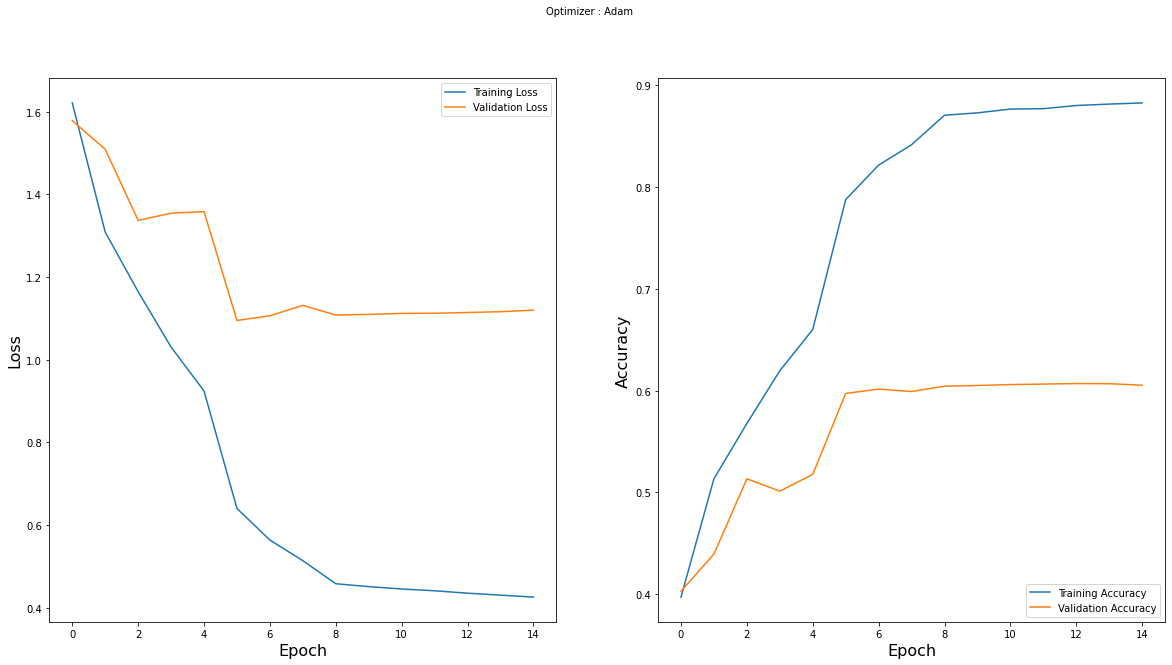

In [ ]:
# mengecek nilai loss dan accuraccy hasil training berdasarkan grafik

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**Membuat Fungsi Prediksi**

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np

# Parameters
input_size = (48,48) 

#define input shape
channel = (3, )
input_shape = (-1,48,48,1)

#define labels
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()
print(labels)

dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])


In [ ]:
from keras.models import load_model

model = load_model('model_15.h5',compile=False)
model2 = load_model('model_5.h5',compile=False)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import img_to_array, load_img
from keras.models import load_model
from tabulate import tabulate

def preprocess(img) :
  img = rgb2gray(img)
  img = scale(img, 48, 48)
  return img

def reshape(img) :
  return img_to_array(img).reshape(input_shape)

def predict(img_array) :
  y = model.predict(img_array)
  table = [['Label', 'Value', '%']]
  for i in range(7):
    label = list(labels)[i]
    val = round(list(np.array(y))[0][i], 2)
    percentage = round((val*100), 2)

    table.append([label,val,percentage])

  print (tabulate(table, headers='firstrow', tablefmt='fancy_grid', showindex=range(1,8)))

def predict2(img_array) :
  y = model.predict(img_array)
  table = [['Label', 'Value', '%']]
  for i in range(7):
    label = list(labels)[i]
    val = round(list(np.array(y))[0][i], 2)
    percentage = round((val*100), 2)

    table.append([label,val,percentage])

  hasil = (list(labels)[np.argmax(y)])

  return table, hasil

In [ ]:
import os

test_path = "dataset2/test"

true = 0
false = 0
acc = 0

for dir in os.listdir(test_path) :
  dir_path = os.path.join(test_path,dir)
  for file in os.listdir(dir_path) :
    img = mpimg.imread(os.path.join(dir_path,file))
    if img is not None :
      img_array = reshape(img)
      y = model.predict(img_array)
      predicted_label = list(labels)[np.argmax(y)]
      if predicted_label == dir: true += 1
      else: false += 1

acc = round((true/(true+false))*100, 2)

print("Benar: ", true)
print("Salah: ", false)
print("Akurasi: ", acc, "%")


Benar:  2291
Salah:  400
Akurasi:  85.14 %


In [ ]:
import os

test_path = "dataset2/test"

true = 0
false = 0
acc = 0

for dir in os.listdir(test_path) :
  dir_path = os.path.join(test_path,dir)
  for file in os.listdir(dir_path) :
    img = mpimg.imread(os.path.join(dir_path,file))
    if img is not None :
      img_array = reshape(img)
      y = model2.predict(img_array)
      predicted_label = list(labels)[np.argmax(y)]
      if predicted_label == dir: true += 1
      else: false += 1

acc = round((true/(true+false))*100, 2)

print("Benar: ", true)
print("Salah: ", false)
print("Akurasi: ", acc, "%")

Benar:  2168
Salah:  523
Akurasi:  80.56 %


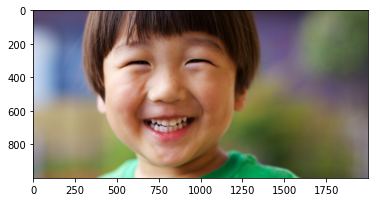

╒════╤══════════╤═════════╤═════╕
│    │ Label    │   Value │   % │
╞════╪══════════╪═════════╪═════╡
│  1 │ angry    │    0.02 │   2 │
├────┼──────────┼─────────┼─────┤
│  2 │ disgust  │    0    │   0 │
├────┼──────────┼─────────┼─────┤
│  3 │ fear     │    0    │   0 │
├────┼──────────┼─────────┼─────┤
│  4 │ happy    │    0.95 │  95 │
├────┼──────────┼─────────┼─────┤
│  5 │ neutral  │    0    │   0 │
├────┼──────────┼─────────┼─────┤
│  6 │ sad      │    0    │   0 │
├────┼──────────┼─────────┼─────┤
│  7 │ surprise │    0.02 │   2 │
╘════╧══════════╧═════════╧═════╛


In [ ]:
# img = preprocess('rgb_tes/happy1.jpg'

img = mpimg.imread('rgb_tes/happy1.jpg')

plt.imshow(img)
plt.show()

img = preprocess(img)

img_array = reshape(img)
predict(img_array)

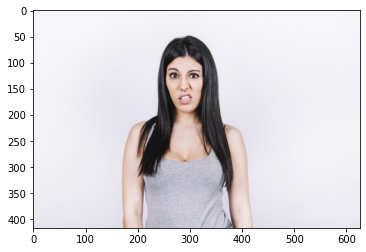

╒════╤══════════╤═════════╤═════╕
│    │ Label    │   Value │   % │
╞════╪══════════╪═════════╪═════╡
│  1 │ angry    │    0.25 │  25 │
├────┼──────────┼─────────┼─────┤
│  2 │ disgust  │    0.01 │   1 │
├────┼──────────┼─────────┼─────┤
│  3 │ fear     │    0.06 │   6 │
├────┼──────────┼─────────┼─────┤
│  4 │ happy    │    0.18 │  18 │
├────┼──────────┼─────────┼─────┤
│  5 │ neutral  │    0.16 │  16 │
├────┼──────────┼─────────┼─────┤
│  6 │ sad      │    0.04 │   4 │
├────┼──────────┼─────────┼─────┤
│  7 │ surprise │    0.3  │  30 │
╘════╧══════════╧═════════╧═════╛


In [ ]:
# img = preprocess('rgb_tes/happy1.jpg'

img = mpimg.imread('rgb_tes/disgust1.jpg')

plt.imshow(img)
plt.show()

img = preprocess(img)

img_array = reshape(img)
predict(img_array)

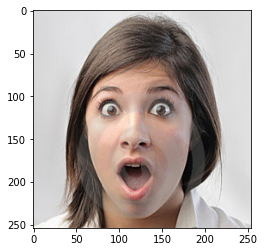

╒════╤══════════╤═════════╤═════╕
│    │ Label    │   Value │   % │
╞════╪══════════╪═════════╪═════╡
│  1 │ angry    │       0 │   0 │
├────┼──────────┼─────────┼─────┤
│  2 │ disgust  │       0 │   0 │
├────┼──────────┼─────────┼─────┤
│  3 │ fear     │       0 │   0 │
├────┼──────────┼─────────┼─────┤
│  4 │ happy    │       0 │   0 │
├────┼──────────┼─────────┼─────┤
│  5 │ neutral  │       0 │   0 │
├────┼──────────┼─────────┼─────┤
│  6 │ sad      │       0 │   0 │
├────┼──────────┼─────────┼─────┤
│  7 │ surprise │       1 │ 100 │
╘════╧══════════╧═════════╧═════╛


In [ ]:
# img = preprocess('rgb_tes/happy1.jpg'

img = mpimg.imread('rgb_tes/surprise1.jpg')

plt.imshow(img)
plt.show()

img = preprocess(img)

img_array = reshape(img)
predict(img_array)

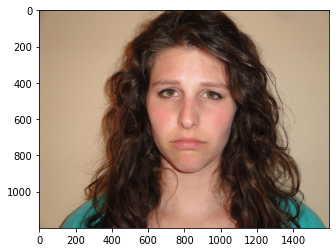

╒════╤══════════╤═════════╤═════╕
│    │ Label    │   Value │   % │
╞════╪══════════╪═════════╪═════╡
│  1 │ angry    │    0    │   0 │
├────┼──────────┼─────────┼─────┤
│  2 │ disgust  │    0.01 │   1 │
├────┼──────────┼─────────┼─────┤
│  3 │ fear     │    0.06 │   6 │
├────┼──────────┼─────────┼─────┤
│  4 │ happy    │    0.07 │   7 │
├────┼──────────┼─────────┼─────┤
│  5 │ neutral  │    0.1  │  10 │
├────┼──────────┼─────────┼─────┤
│  6 │ sad      │    0.76 │  76 │
├────┼──────────┼─────────┼─────┤
│  7 │ surprise │    0    │   0 │
╘════╧══════════╧═════════╧═════╛


In [ ]:
# img = preprocess('rgb_tes/happy1.jpg'

img = mpimg.imread('rgb_tes/sad1.jpg')

plt.imshow(img)
plt.show()

img = preprocess(img)

img_array = reshape(img)
predict(img_array)